In [8]:
#import important libraries
import numpy as np
import pandas as pd
from pandas import DataFrame

#import statistics libraries
import statistics
from scipy import stats
from statsmodels.formula.api import logit
from statsmodels.formula.api import ols

#import visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#import CSV file
med_data = pd.read_csv("~/Documents/WGU/D208 - Predictive Modeling/medical_clean.csv")

In [3]:
#Checking for Duplicates/Missing Values

print(med_data.duplicated().value_counts())
print("")
print(med_data.isnull().value_counts())
print("")
print(med_data.isna().value_counts())

False    10000
dtype: int64

CaseOrder  Customer_id  Interaction  UID    City   State  County  Zip    Lat    Lng    Population  Area   TimeZone  Job    Children  Age    Income  Marital  Gender  ReAdmis  VitD_levels  Doc_visits  Full_meals_eaten  vitD_supp  Soft_drink  Initial_admin  HighBlood  Stroke  Complication_risk  Overweight  Arthritis  Diabetes  Hyperlipidemia  BackPain  Anxiety  Allergic_rhinitis  Reflux_esophagitis  Asthma  Services  Initial_days  TotalCharge  Additional_charges  Item1  Item2  Item3  Item4  Item5  Item6  Item7  Item8
False      False        False        False  False  False  False   False  False  False  False       False  False     False  False     False  False   False    False   False    False        False       False             False      False       False          False      False   False              False       False      False     False           False     False    False              False               False   False     False         False        False 

In [4]:
## Re-expression of Categorical Variables

## Boolean

#Get dummies for boolean (Yes/No) variables
prefix_list = ['ReAdmis','HighBlood', 'Overweight', 'Soft_drink', 'Stroke', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 
               'BackPain', 'Anxiety', 'Asthma', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Services', 
               'Initial_admin', 'Gender', 'Marital', 'Complication_risk']
med_data = pd.get_dummies(med_data, 
                          prefix=prefix_list, 
                          prefix_sep='_', 
                          dummy_na=False,
                          drop_first=True,
                          columns=prefix_list)

In [5]:
## A bit of housecleaning on variables

#rename columns
med_data.rename(columns = {'Initial_admin_Observation Admission': 'Initial_admin_Observation'}, inplace=True)
med_data.rename(columns = {'Initial_admin_Emergency Admission': 'Initial_admin_Emergency'}, inplace=True)
med_data.rename(columns = {'Services_Intravenous': 'Services_IV'}, inplace=True)
med_data.rename(columns = {'Services_CT Scan': 'Services_CT'}, inplace=True)
med_data.rename(columns = {'vitD_supp': 'VitD_supp'}, inplace=True)
med_data.rename(columns = {'Marital_Never Married': 'Marital_Single'}, inplace=True)

#update dtype
med_data['Initial_admin_Observation'] = med_data['Initial_admin_Observation'].astype('int64')
med_data['Initial_admin_Emergency'] = med_data['Initial_admin_Emergency'].astype('int64')
med_data['Services_CT'] = med_data['Services_CT'].astype('int64')
med_data['Services_IV'] = med_data['Services_IV'].astype('int64')
med_data['Services_MRI'] = med_data['Services_MRI'].astype('int64')
med_data['Marital_Married'] = med_data['Marital_Married'].astype('int64')
med_data['Marital_Single'] = med_data['Marital_Single'].astype('int64')
med_data['Marital_Separated'] = med_data['Marital_Separated'].astype('int64')
med_data['Marital_Widowed'] = med_data['Marital_Widowed'].astype('int64')
med_data['Gender_Male'] = med_data['Gender_Male'].astype('int64')
med_data['Gender_Nonbinary'] = med_data['Gender_Nonbinary'].astype('int64')

In [6]:
#Statistical Data for Continuous variables
print(med_data.Initial_days.describe())
print("")

#Statistical Data for Categorical variables
print(med_data.groupby('ReAdmis_Yes').apply(len))
print("")
print(med_data.groupby('Gender_Male').apply(len))
print("")
print(med_data.groupby('Initial_admin_Emergency').apply(len))
print("")
print(med_data.groupby('Services_CT').apply(len))
print("")
print(med_data.groupby('Services_MRI').apply(len))
print("")
print(med_data.groupby('HighBlood_Yes').apply(len))
print("")
print(med_data.groupby('Stroke_Yes').apply(len))
print("")
print(med_data.groupby('Arthritis_Yes').apply(len))
print("")
print(med_data.groupby('Allergic_rhinitis_Yes').apply(len))
print("")
print(med_data.groupby('Reflux_esophagitis_Yes').apply(len))
print("")
print(med_data.groupby('Asthma_Yes').apply(len))
print("")
print(med_data.groupby('Anxiety_Yes').apply(len))
print("")
print(med_data.groupby('BackPain_Yes').apply(len))
print("")
print(med_data.groupby('Hyperlipidemia_Yes').apply(len))
print("")
print(med_data.groupby('Complication_risk_Low').apply(len))

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

ReAdmis_Yes
0    6331
1    3669
dtype: int64

Gender_Male
0    5232
1    4768
dtype: int64

Initial_admin_Emergency
0    4940
1    5060
dtype: int64

Services_CT
0    8775
1    1225
dtype: int64

Services_MRI
0    9620
1     380
dtype: int64

HighBlood_Yes
0    5910
1    4090
dtype: int64

Stroke_Yes
0    8007
1    1993
dtype: int64

Arthritis_Yes
0    6426
1    3574
dtype: int64

Allergic_rhinitis_Yes
0    6059
1    3941
dtype: int64

Reflux_esophagitis_Yes
0    5865
1    4135
dtype: int64

Asthma_Yes
0    7107
1    2893
dtype: int64

Anxiety_Yes
0    6785
1    3215
dtype: int64

BackPain_Yes
0    5886
1    4114
dtype: int64

Hyperlipidemia_Yes
0    6628
1    3372
dtype: int64

Complication_risk_Low
0    7875
1    2125
dtype: int64


In [7]:
model_ReAdmis_all = logit('ReAdmis_Yes ~ Gender_Male + Gender_Nonbinary + Marital_Married + Marital_Single + Marital_Separated + Marital_Widowed + Initial_admin_Emergency + Initial_admin_Observation + Services_CT + Services_MRI + Services_IV + VitD_levels + VitD_supp + Doc_visits + Full_meals_eaten + Age + Initial_days + HighBlood_Yes + Stroke_Yes + Arthritis_Yes + Allergic_rhinitis_Yes + Reflux_esophagitis_Yes + Asthma_Yes + Anxiety_Yes + BackPain_Yes + Hyperlipidemia_Yes + Complication_risk_Low + Complication_risk_Medium', data=med_data).fit()
print(model_ReAdmis_all.summary())

Optimization terminated successfully.
         Current function value: 0.033472
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:            ReAdmis_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9971
Method:                           MLE   Df Model:                           28
Date:                Tue, 27 Aug 2024   Pseudo R-squ.:                  0.9491
Time:                        16:31:16   Log-Likelihood:                -334.72
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   -80.7985      4.559    -17.722      0.000     -89

In [9]:
## Checking for Multicollinearity

# Import functions
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Get variables for which to compute VIF and add intercept term
X = med_data[['Age', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'VitD_supp', 'Initial_days', 'ReAdmis_Yes', 'HighBlood_Yes',
       'Stroke_Yes', 'Arthritis_Yes',
       'Hyperlipidemia_Yes', 'BackPain_Yes', 'Anxiety_Yes',
       'Asthma_Yes', 'Allergic_rhinitis_Yes', 'Reflux_esophagitis_Yes',
       'Services_CT', 'Services_IV', 'Services_MRI', 'Initial_admin_Emergency',
       'Initial_admin_Observation', 'Gender_Male', 'Gender_Nonbinary',
       'Marital_Married', 'Marital_Single', 'Marital_Separated',
       'Marital_Widowed', 'Complication_risk_Low', 'Complication_risk_Medium']]

# Compute and view VIF
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# View results using print
print(vif)

                    variables        VIF
0                         Age   7.388564
1                 VitD_levels  31.544178
2                  Doc_visits  19.815133
3            Full_meals_eaten   1.985156
4                   VitD_supp   1.403066
5                Initial_days   9.757539
6                 ReAdmis_Yes   5.728175
7               HighBlood_Yes   1.690398
8                  Stroke_Yes   1.248964
9               Arthritis_Yes   1.558594
10         Hyperlipidemia_Yes   1.504118
11               BackPain_Yes   1.699841
12                Anxiety_Yes   1.472914
13                 Asthma_Yes   1.406318
14      Allergic_rhinitis_Yes   1.645706
15     Reflux_esophagitis_Yes   1.695213
16                Services_CT   1.233769
17                Services_IV   1.588306
18               Services_MRI   1.072661
19    Initial_admin_Emergency   2.989403
20  Initial_admin_Observation   1.953913
21                Gender_Male   1.935106
22           Gender_Nonbinary   1.045473
23            Ma

In [10]:
model_ReAdmis_red = logit('ReAdmis_Yes ~  Gender_Male + Initial_admin_Emergency + Services_CT + Services_MRI + Initial_days + HighBlood_Yes + Stroke_Yes + Arthritis_Yes + Allergic_rhinitis_Yes + Reflux_esophagitis_Yes + Asthma_Yes + Anxiety_Yes + BackPain_Yes + Hyperlipidemia_Yes + Complication_risk_Low', data=med_data).fit()
print(model_ReAdmis_red.summary())

Optimization terminated successfully.
         Current function value: 0.034141
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:            ReAdmis_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9984
Method:                           MLE   Df Model:                           15
Date:                Wed, 28 Aug 2024   Pseudo R-squ.:                  0.9481
Time:                        12:22:13   Log-Likelihood:                -341.41
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -78.4579      4.312    -18.195      0.000     -86.909  

In [11]:
AIC_ReAdmis_initial = ols('ReAdmis_Yes ~ Gender_Male + Gender_Nonbinary + Marital_Married + Marital_Single + Marital_Separated + Marital_Widowed + Initial_admin_Emergency + Initial_admin_Observation + Services_CT + Services_MRI + Services_IV + VitD_levels + VitD_supp + Doc_visits + Full_meals_eaten + Age + Initial_days + HighBlood_Yes + Stroke_Yes + Arthritis_Yes + Allergic_rhinitis_Yes + Reflux_esophagitis_Yes + Asthma_Yes + Anxiety_Yes + BackPain_Yes + Hyperlipidemia_Yes + Complication_risk_Low + Complication_risk_Medium', data=med_data).fit()
AIC_ReAdmis_reduced = ols('ReAdmis_Yes ~  Gender_Male + Initial_admin_Emergency + Services_CT + Services_MRI + Initial_days + HighBlood_Yes + Stroke_Yes + Arthritis_Yes + Allergic_rhinitis_Yes + Reflux_esophagitis_Yes + Asthma_Yes + Anxiety_Yes + BackPain_Yes + Hyperlipidemia_Yes + Complication_risk_Low', data=med_data).fit()
print("The AIC of the initial model is", AIC_ReAdmis_initial.aic)
print("The AIC of the reduced model is", AIC_ReAdmis_reduced.aic)

The AIC of the initial model is 892.9273016705229
The AIC of the reduced model is 875.5576910840173


In [12]:
conf_matrix_all = model_ReAdmis_all.pred_table()
conf_matrix_red = model_ReAdmis_red.pred_table()
print(conf_matrix_all)
print(conf_matrix_red)

[[6254.   77.]
 [  66. 3603.]]
[[6256.   75.]
 [  67. 3602.]]


In [13]:
# Extract TN, TP, FN and FP from conf_matrix_all 
TN = conf_matrix_all[0,0]
TP = conf_matrix_all[1,1]
FN = conf_matrix_all[1,0]
FP = conf_matrix_all[0,1]

# Calculate and print the accuracy
accuracy = (TN + TP) / (TN + FN + FP + TP)
print("The accuracy    of the initial model is", np.round((accuracy * 100),2), "%")

# Calculate and print the sensitivity
sensitivity = TP / (TP + FN)
print("The sensitivity of the initial model is", np.round((sensitivity * 100),2), "%")

# Calculate and print the specificity
specificity = TN / (TN + FP)
print("The specificity of the initial model is", np.round((specificity * 100),2), "%")

The accuracy    of the initial model is 98.57 %
The sensitivity of the initial model is 98.2 %
The specificity of the initial model is 98.78 %


In [14]:
# Extract TN, TP, FN and FP from conf_matrix_red
TN = conf_matrix_red[0,0]
TP = conf_matrix_red[1,1]
FN = conf_matrix_red[1,0]
FP = conf_matrix_red[0,1]

# Calculate and print the accuracy
accuracy = (TN + TP) / (TN + FN + FP + TP)
print("The accuracy    of the reduced model is", np.round((accuracy * 100),2), "%")

# Calculate and print the sensitivity
sensitivity = TP / (TP + FN)
print("The sensitivity of the reduced model is", np.round((sensitivity * 100),2), "%")

# Calculate and print the specificity
specificity = TN / (TN + FP)
print("The specificity of the reduced model is", np.round((specificity * 100),2), "%")

The accuracy    of the reduced model is 98.58 %
The sensitivity of the reduced model is 98.17 %
The specificity of the reduced model is 98.82 %


<Axes: xlabel='ReAdmis_Yes', ylabel='count'>

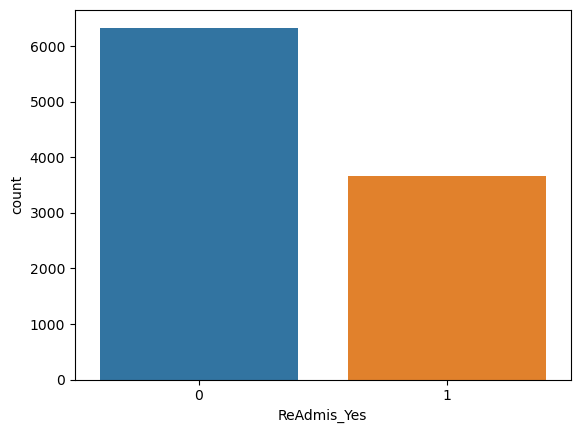

In [15]:
sns.countplot(x='ReAdmis_Yes', data=med_data)

<Axes: xlabel='Gender_Male', ylabel='count'>

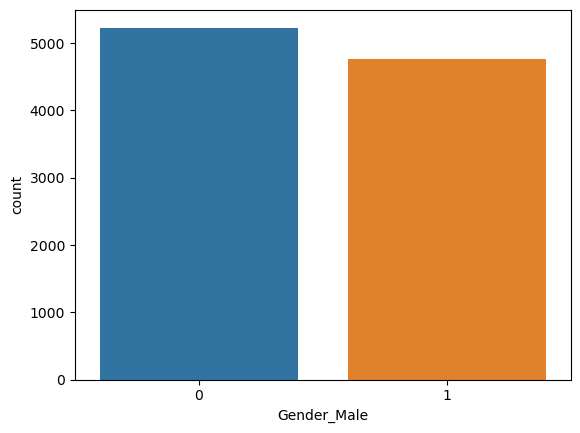

In [16]:
sns.countplot(x='Gender_Male', data=med_data)

<Axes: xlabel='Initial_admin_Emergency', ylabel='count'>

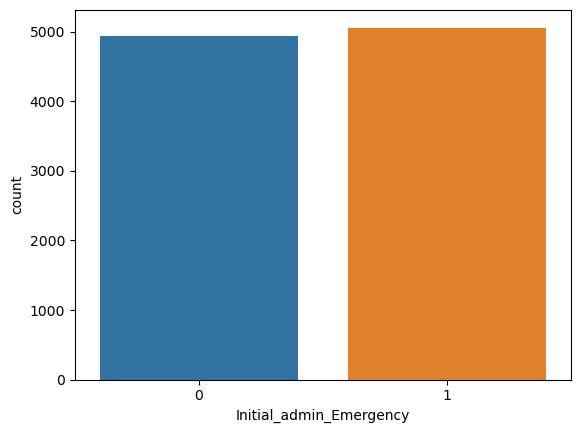

In [17]:
sns.countplot(x='Initial_admin_Emergency', data=med_data)

<Axes: xlabel='Services_CT', ylabel='count'>

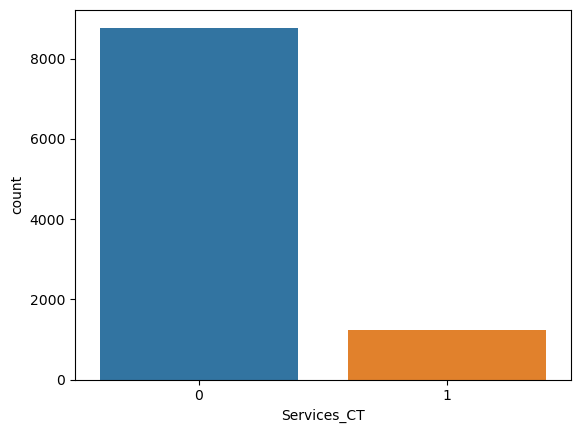

In [18]:
sns.countplot(x='Services_CT', data=med_data)

<Axes: xlabel='Services_MRI', ylabel='count'>

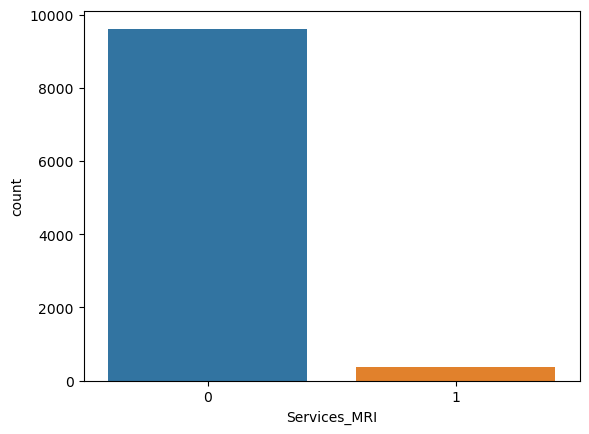

In [19]:
sns.countplot(x='Services_MRI', data=med_data)

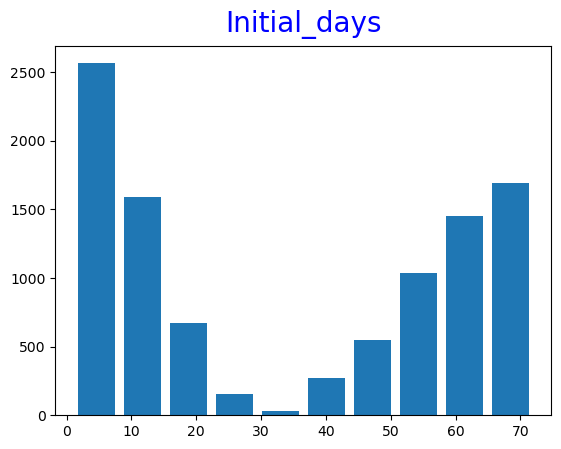

In [20]:
plt.hist(med_data.Initial_days, rwidth=0.8, bins=10)
plt.title('Initial_days', fontsize=20, pad=10, color='blue')
plt.show()

<Axes: xlabel='HighBlood_Yes', ylabel='count'>

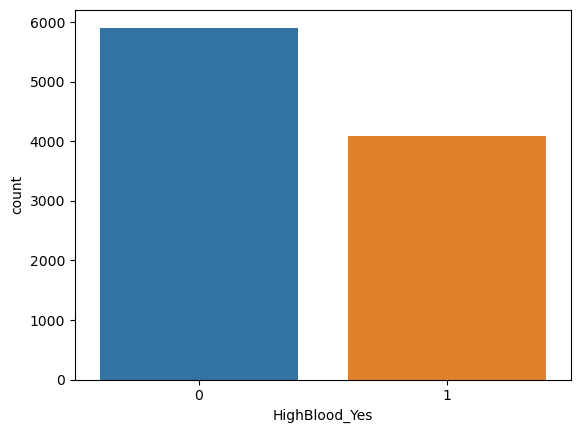

In [21]:
sns.countplot(x='HighBlood_Yes', data=med_data)

<Axes: xlabel='Stroke_Yes', ylabel='count'>

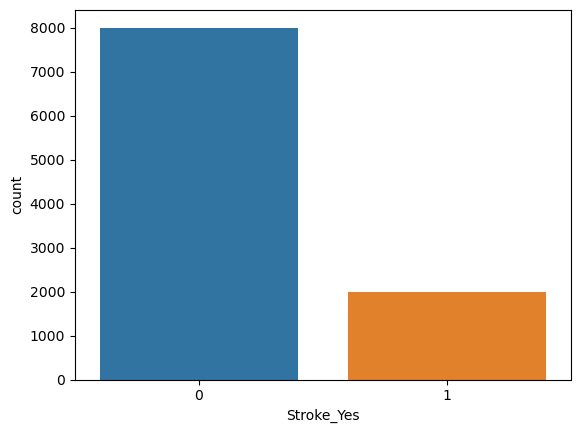

In [22]:
sns.countplot(x='Stroke_Yes', data=med_data)

<Axes: xlabel='Arthritis_Yes', ylabel='count'>

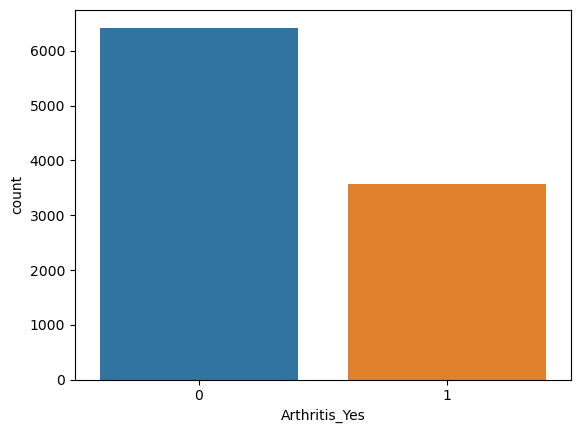

In [23]:
sns.countplot(x='Arthritis_Yes', data=med_data)

<Axes: xlabel='Allergic_rhinitis_Yes', ylabel='count'>

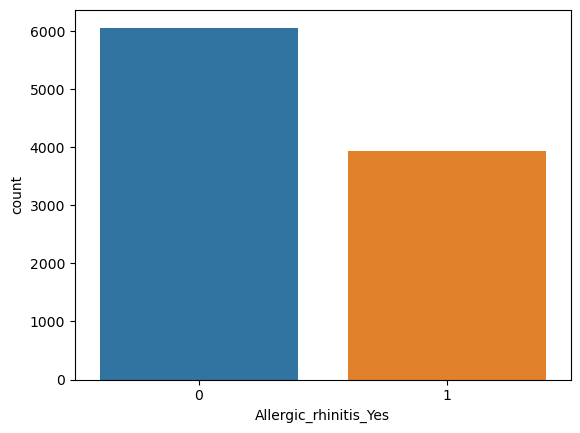

In [24]:
sns.countplot(x='Allergic_rhinitis_Yes', data=med_data)

<Axes: xlabel='Reflux_esophagitis_Yes', ylabel='count'>

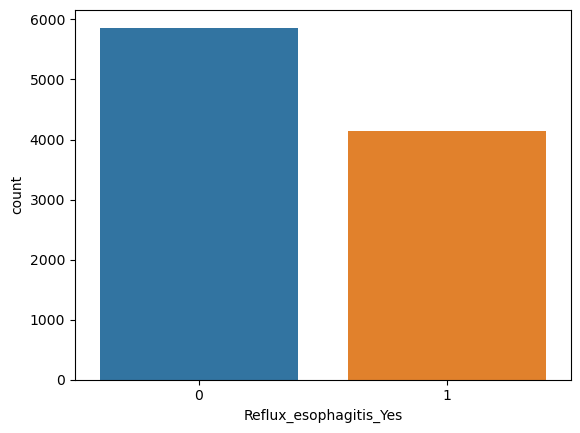

In [25]:
sns.countplot(x='Reflux_esophagitis_Yes', data=med_data)

<Axes: xlabel='Asthma_Yes', ylabel='count'>

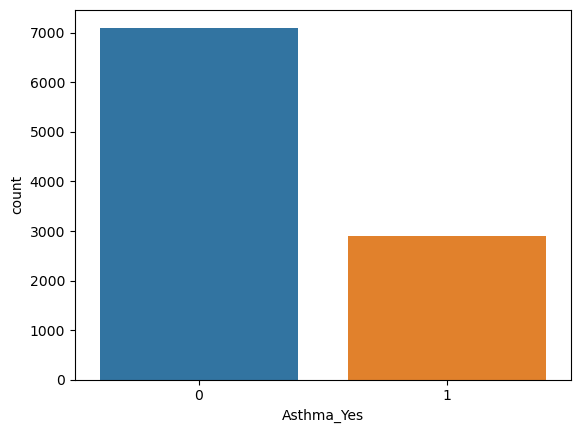

In [26]:
sns.countplot(x='Asthma_Yes', data=med_data)

<Axes: xlabel='Anxiety_Yes', ylabel='count'>

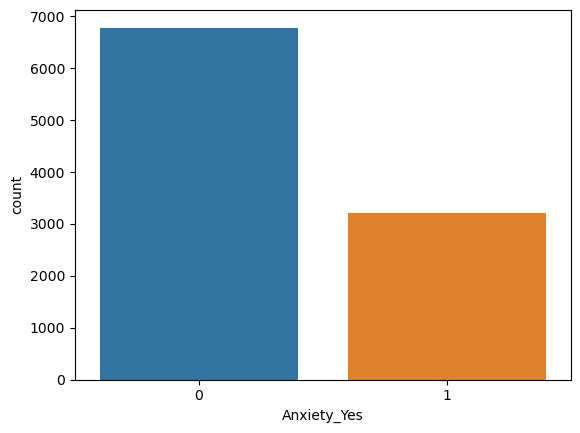

In [27]:
sns.countplot(x='Anxiety_Yes', data=med_data)

<Axes: xlabel='BackPain_Yes', ylabel='count'>

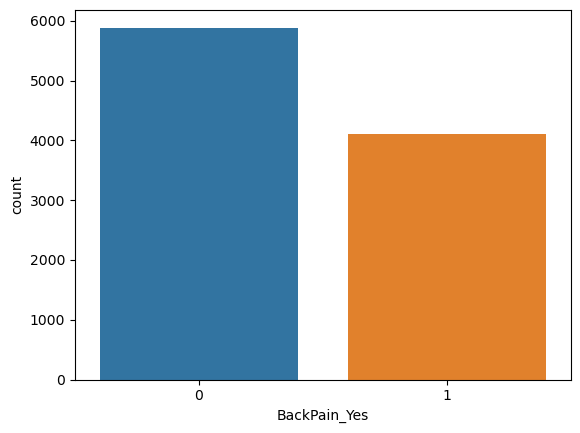

In [28]:
sns.countplot(x='BackPain_Yes', data=med_data)

<Axes: xlabel='Hyperlipidemia_Yes', ylabel='count'>

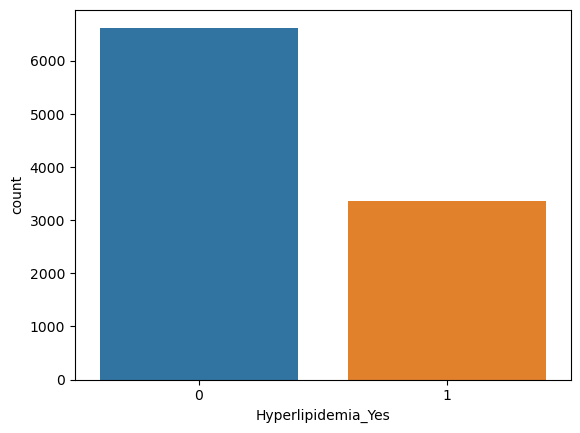

In [29]:
sns.countplot(x='Hyperlipidemia_Yes', data=med_data)

<Axes: xlabel='Complication_risk_Low', ylabel='count'>

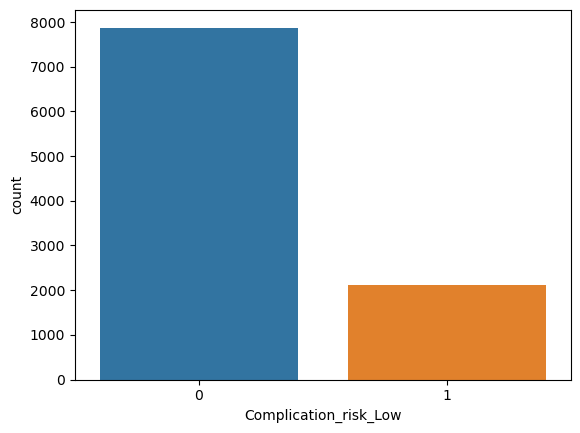

In [30]:
sns.countplot(x='Complication_risk_Low', data=med_data)

<Axes: xlabel='Initial_days', ylabel='ReAdmis_Yes'>

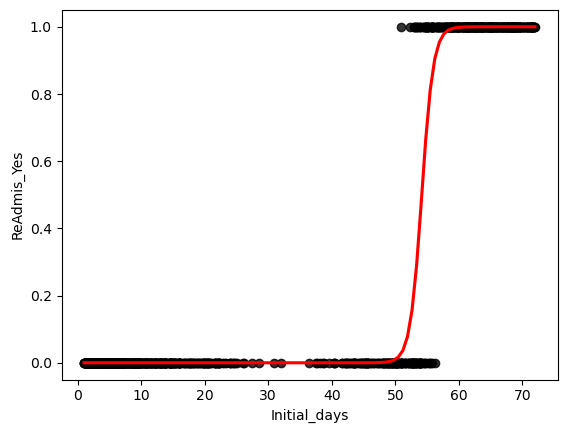

In [31]:
subset = med_data.sample(n=1000, random_state=500)

sns.regplot(x='Initial_days',
           y='ReAdmis_Yes',
           data=subset,
           logistic=True,
           ci=None,
           scatter_kws={'color': 'black'},
           line_kws={'color': 'red'})

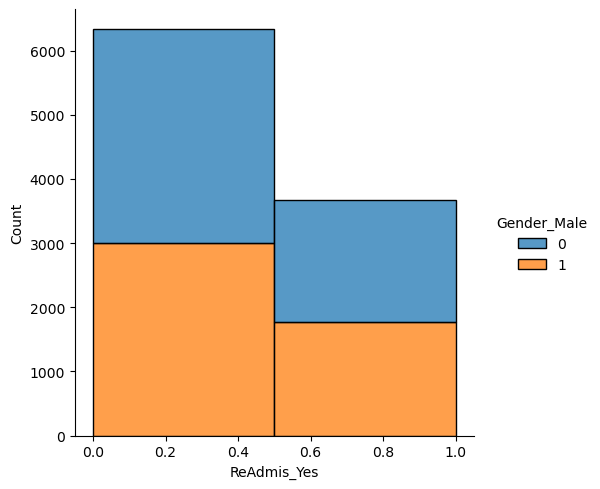

In [32]:
sns.displot(x='ReAdmis_Yes',
            hue='Gender_Male',
            bins=2,
            data=med_data,
            multiple='stack')

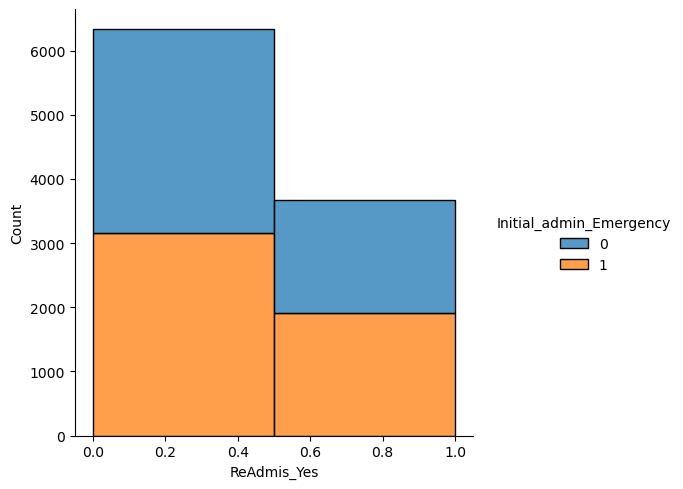

In [33]:
sns.displot(x='ReAdmis_Yes',
            hue='Initial_admin_Emergency',
            bins=2,
            data=med_data,
            multiple='stack')

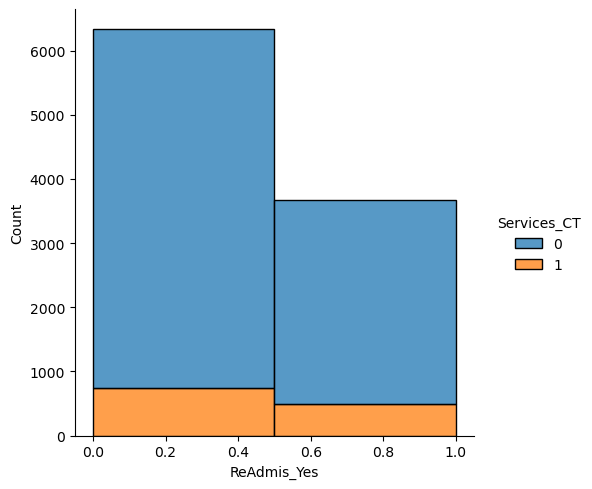

In [34]:
sns.displot(x='ReAdmis_Yes',
            hue='Services_CT',
            bins=2,
            data=med_data,
            multiple='stack')

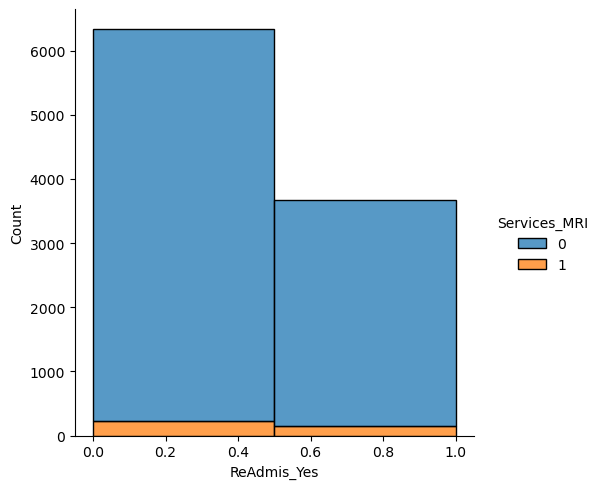

In [35]:
sns.displot(x='ReAdmis_Yes',
            hue='Services_MRI',
            bins=2,
            data=med_data,
            multiple='stack')

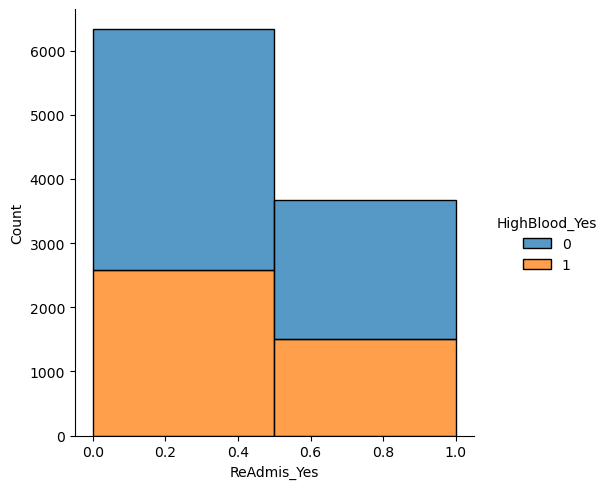

In [36]:
sns.displot(x='ReAdmis_Yes',
            hue='HighBlood_Yes',
            bins=2,
            data=med_data,
            multiple='stack')

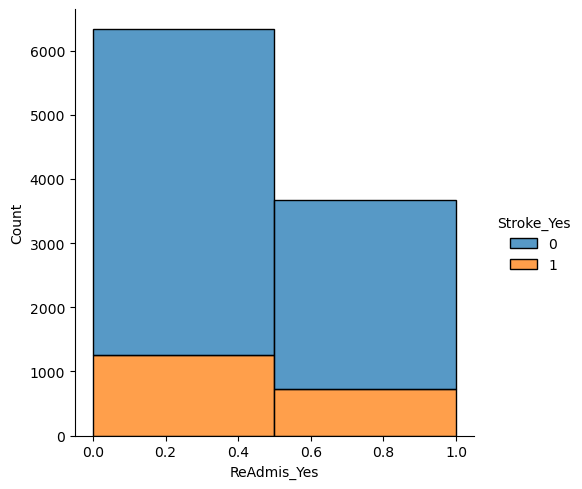

In [37]:
sns.displot(x='ReAdmis_Yes',
            hue='Stroke_Yes',
            bins=2,
            data=med_data,
            multiple='stack')

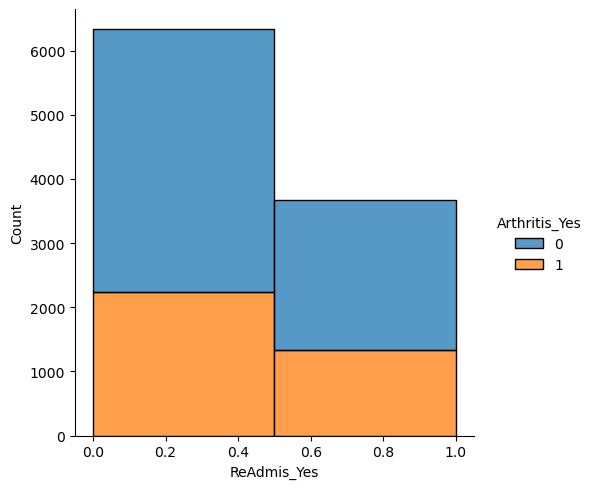

In [38]:
sns.displot(x='ReAdmis_Yes',
            hue='Arthritis_Yes',
            bins=2,
            data=med_data,
            multiple='stack')

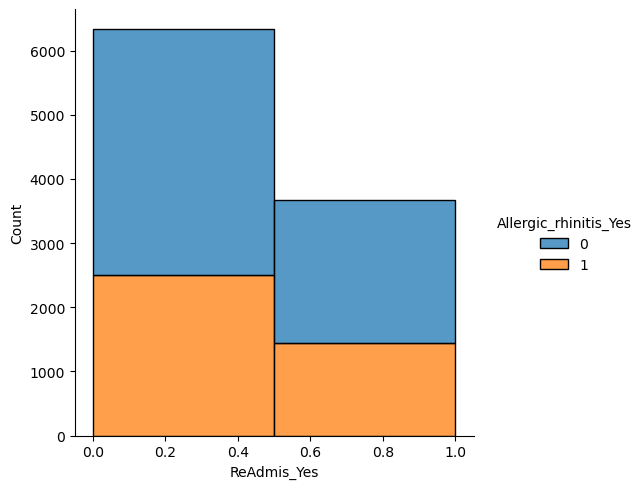

In [39]:
sns.displot(x='ReAdmis_Yes',
            hue='Allergic_rhinitis_Yes',
            bins=2,
            data=med_data,
            multiple='stack')

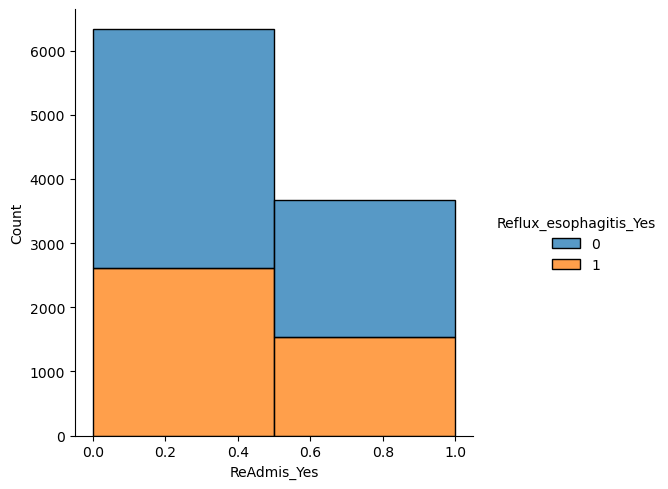

In [40]:
sns.displot(x='ReAdmis_Yes',
            hue='Reflux_esophagitis_Yes',
            bins=2,
            data=med_data,
            multiple='stack')

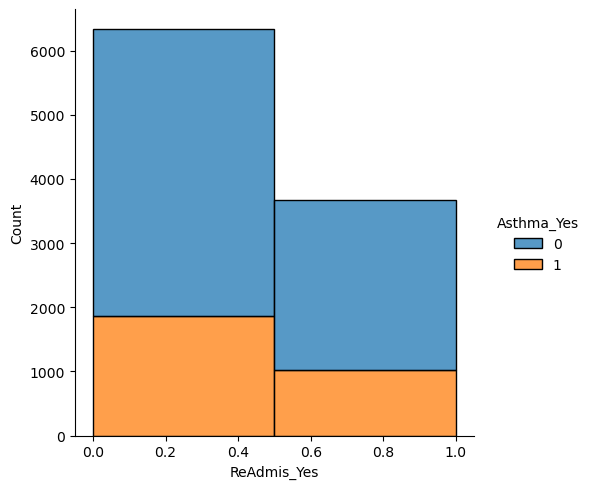

In [41]:
sns.displot(x='ReAdmis_Yes',
            hue='Asthma_Yes',
            bins=2,
            data=med_data,
            multiple='stack')

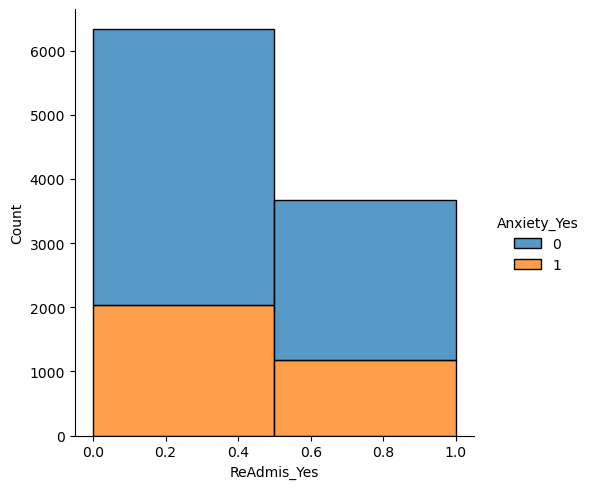

In [42]:
sns.displot(x='ReAdmis_Yes',
            hue='Anxiety_Yes',
            bins=2,
            data=med_data,
            multiple='stack')

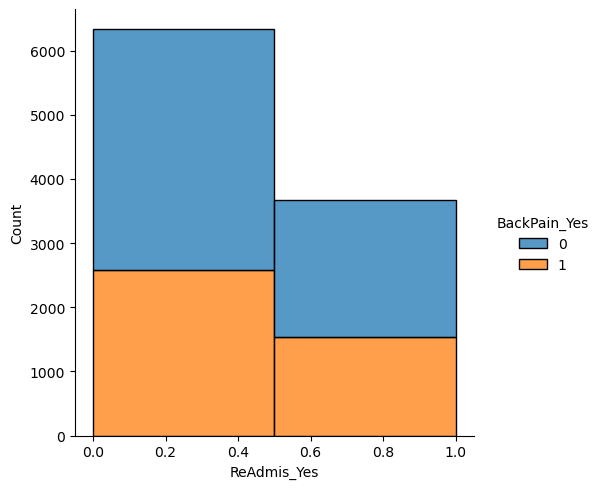

In [43]:
sns.displot(x='ReAdmis_Yes',
            hue='BackPain_Yes',
            bins=2,
            data=med_data,
            multiple='stack')

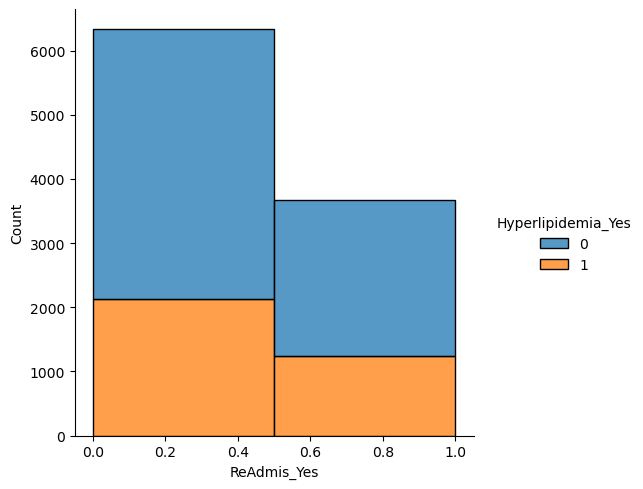

In [44]:
sns.displot(x='ReAdmis_Yes',
            hue='Hyperlipidemia_Yes',
            bins=2,
            data=med_data,
            multiple='stack')

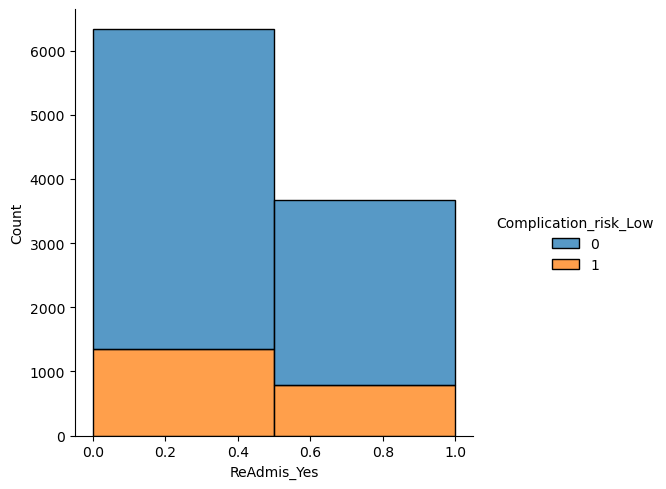

In [45]:
sns.displot(x='ReAdmis_Yes',
            hue='Complication_risk_Low',
            bins=2,
            data=med_data,
            multiple='stack')

In [46]:
med_data.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'VitD_supp', 'Initial_days', 'TotalCharge',
       'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8', 'ReAdmis_Yes', 'HighBlood_Yes',
       'Overweight_Yes', 'Soft_drink_Yes', 'Stroke_Yes', 'Arthritis_Yes',
       'Diabetes_Yes', 'Hyperlipidemia_Yes', 'BackPain_Yes', 'Anxiety_Yes',
       'Asthma_Yes', 'Allergic_rhinitis_Yes', 'Reflux_esophagitis_Yes',
       'Services_CT', 'Services_IV', 'Services_MRI', 'Initial_admin_Emergency',
       'Initial_admin_Observation', 'Gender_Male', 'Gender_Nonbinary',
       'Marital_Married', 'Marital_Single', 'Marital_Separated',
       'Marital_Widowed', 'Complication_risk_Low', 'Complication_risk_Medium'],
      dtype='object')

In [47]:
#Removing columns not needed for this exercise
med_data.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Income', 'TotalCharge',
       'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'], 
               axis=1, 
               inplace=True)

In [48]:
#export CSV file
med_data.to_csv("~/Documents/WGU/D208 - Predictive Modeling/208.2 - medical_clean_final.csv")